# Car Industry Portfolio Project

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(path)
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
# Let's adjust the headers of the data frame

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(path, names = headers)

### Data Exploration + Cleaning

In [4]:
# Missing Data

In [5]:
# Missing values are represented as ?, we need to convert it to NaN to then drop the missing values:

df.replace("?", np.NaN, inplace = True)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# Using a for loop in Python, we also can quickly figure out the percentage of missing values in each column.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

symboling - 0%
normalized-losses - 20%
make - 0%
fuel-type - 0%
aspiration - 0%
num-of-doors - 1%
body-style - 0%
drive-wheels - 0%
engine-location - 0%
wheel-base - 0%
length - 0%
width - 0%
height - 0%
curb-weight - 0%
engine-type - 0%
num-of-cylinders - 0%
engine-size - 0%
fuel-system - 0%
bore - 2%
stroke - 2%
compression-ratio - 0%
horsepower - 1%
peak-rpm - 1%
city-mpg - 0%
highway-mpg - 0%
price - 2%


In [7]:
# There are many ways to handle with missing data. In this project

    # For normalized-losses, bore, stroke, horsepower, peak-rpm (numeric variables) we're going to 
    # Replace NaN (missing values) with the Mean Value.
    
    # For 'num-of-doors', we're going to replace missing values by the most frequent num of doors
    
    # Finally, let's drop all rows that do not have price data (dependent variable that we want to predict)
      

In [8]:
avg_normalized_losses = df["normalized-losses"].astype("float").mean()
avg_bore=df['bore'].astype('float').mean()
avg_stroke = df["stroke"].astype("float").mean()
avg_horsepower = df["horsepower"].astype("float").mean()
avg_peak_rpm = df["peak-rpm"].astype("float").mean()

print("Average of normalized-losses:", avg_normalized_losses)
print("Average of bore:", avg_bore)
print("Average of stroke:", avg_stroke)
print("Average of horsepower:", avg_horsepower)
print("Average of peak-rpm:", avg_peak_rpm)

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810957
Average of stroke: 3.2554228855721337
Average of horsepower: 104.25615763546799
Average of peak-rpm: 5125.369458128079


In [9]:
#Replacing NaN (missing values) with the Mean Value

df['normalized-losses'].replace(np.NaN, avg_normalized_losses, inplace=True)
df['bore'].replace(np.NaN, avg_bore, inplace=True)
df['stroke'].replace(np.NaN, avg_stroke, inplace=True)
df['horsepower'].replace(np.NaN, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.NaN, avg_peak_rpm, inplace=True)

In [10]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [11]:
# Replacing NaN (missing values) with the most frequent value (four)

df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [12]:
# Drop all rows that do not have price data
df.dropna(subset=["price"], inplace=True)

In [13]:
#Reset Index because we droped two rows
df.reset_index(drop=True, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [14]:
#Checking for Data Types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [15]:
# Some columns are not of the correct data type. 

# For example, 'bore' and 'stroke' variables are numerical values that describe the engines, 
# We should expect them to be of the type 'float' or 'int'.

df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [16]:
# Data Standardization

# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]


In [17]:
# Data Normalization

# Normalize lenght, width and height so their value ranges from 0 to 1.
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [18]:
# Let's drop duplicates
df.drop_duplicates()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704


In [19]:
# We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type and aspiration

In [20]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

# Merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857,0,1
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000,0,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391,0,1
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704,1,0


In [21]:
# Drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [22]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
df = pd.concat([df,dummy_variable_2],axis=1)

# Drop original column "aspiration" from "df"
df.drop("aspiration",axis=1, inplace=True)
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,5400.0,23,28,16845.0,10.217391,8.392857,0,1,1,0
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,5300.0,19,25,19045.0,12.368421,9.400000,0,1,0,1
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,5500.0,18,23,21485.0,13.055556,10.217391,0,1,1,0
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,4800.0,26,27,22470.0,9.038462,8.703704,1,0,0,1


In [23]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [24]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,59
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,68
freq,32,115,94,118,198,145,157,92,19


### Potential Predictors of Price (Visualization)

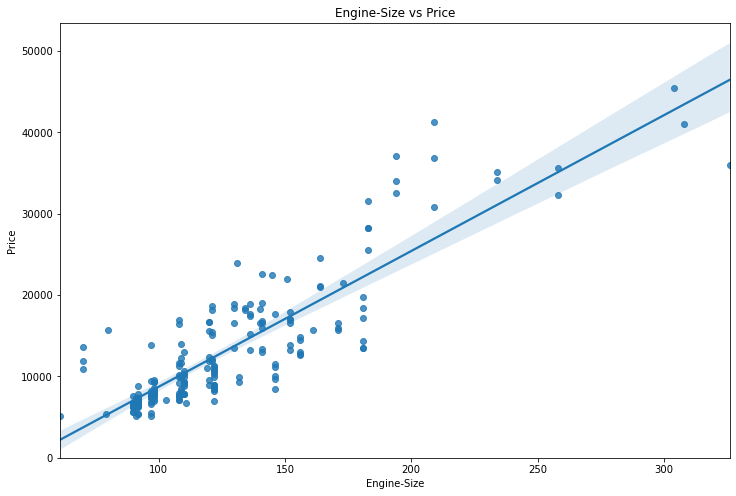

In [25]:
# Engine size as potential predictor variable of price. 

# Let's find the scatterplot of "engine-size" and "price":

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.title('Engine-Size vs Price')
plt.xlabel('Engine-Size')
plt.ylabel('Price')
plt.show()

In [26]:
# Exact Correlation between variables

df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


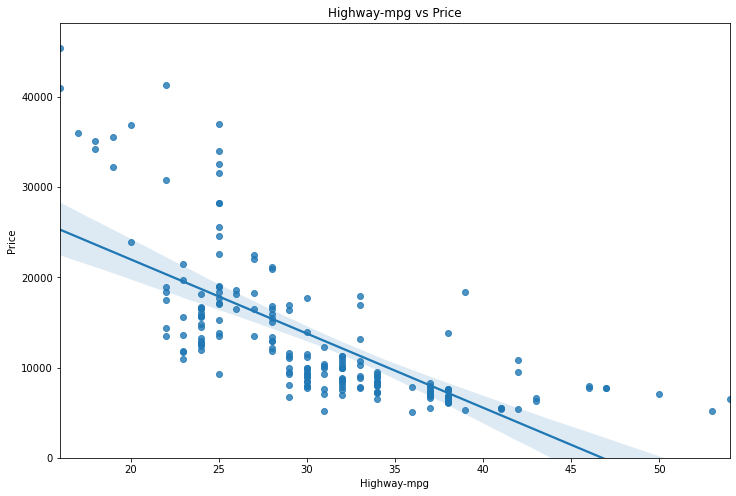

In [27]:
# Highway mpg is a potential predictor variable of price. 

# Let's find the scatterplot of "highway-mpg" and "price":

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.title('Highway-mpg vs Price')
plt.xlabel('Highway-mpg')
plt.ylabel('Price')
plt.show()

In [28]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [29]:
# Categorical Variables: can have the type "object" or "int64"

<AxesSubplot:xlabel='body-style', ylabel='price'>

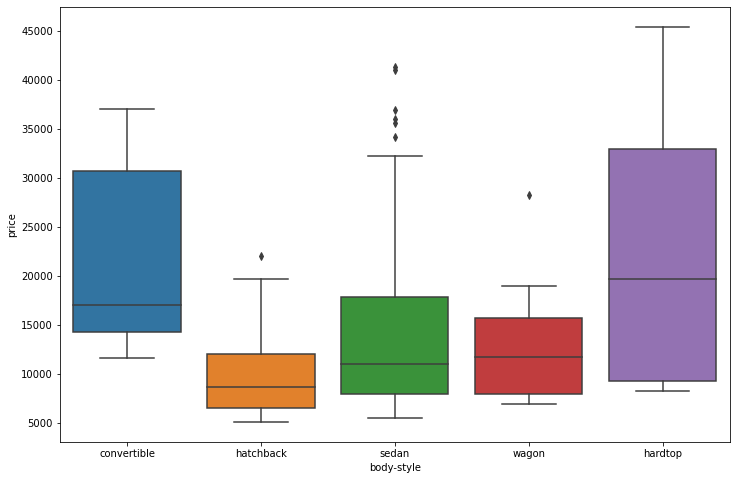

In [30]:
sns.boxplot(x="body-style", y="price", data=df)

In [31]:
# Distributions of price between the different body-style categories have a significant overlap, 
# so body-style would not be a good predictor of price.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

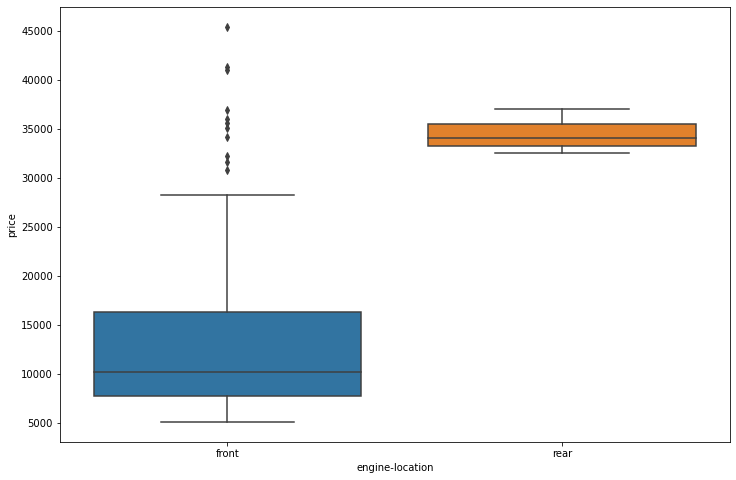

In [32]:
sns.boxplot(x="engine-location", y="price", data=df)

In [33]:
# Distribution of price between these two engine-location categories, front and rear, are distinct enough to take 
# engine-location as a potential good predictor of price.

In [34]:
# Let's dive more into engine-location...
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


In [35]:
# Engine location would not be a good predictor variable for the price. 
# This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed.

In [36]:
# Visualising each variable can be a very time-consuming and tedious process, so we will now perform the 
# correlation analysis using the correlation matrix or heat maps to visualise it better. 

### Correlation Analysis and Causation

In [37]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


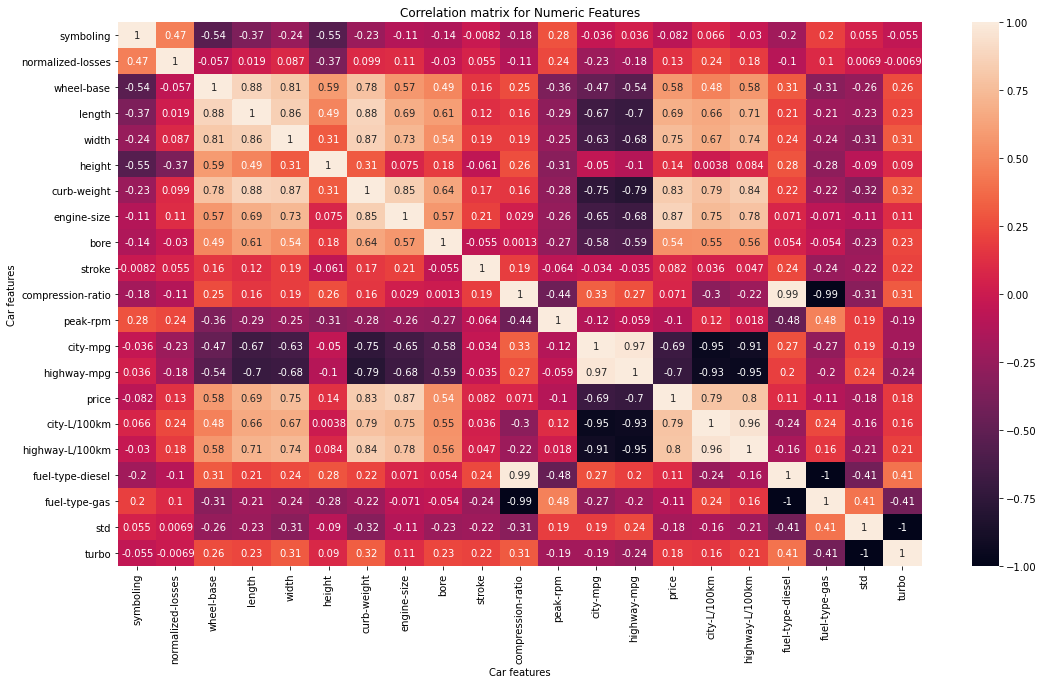

In [38]:
# We could use a heatmap to display clearly the correlations between our variables

matplotlib.rcParams['figure.figsize'] = (18,10)
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Car features")
plt.ylabel("Car features")

plt.show()

In [39]:
# Using factorize - this assigns a random numeric value for each unique categorical value. This is a possible way to display
# correlations between all variables (not only the numeric ones)

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
symboling,1.000000,0.186148,0.242755,0.651166,0.435177,-0.076672,-0.195141,0.408288,0.314152,0.350454,...,0.097833,0.171407,0.003809,0.301363,0.171407,0.003809,0.240579,0.240579,0.038456,0.038456
normalized-losses,0.186148,1.000000,0.662867,0.106361,-0.005460,0.080409,-0.163694,0.506831,0.607686,0.376580,...,0.228029,0.205016,0.161052,0.590136,0.205016,0.161052,0.039445,0.039445,-0.010353,-0.010353
make,0.242755,0.662867,1.000000,0.146172,0.153700,0.034844,0.053312,0.742550,0.915076,0.453780,...,0.401575,0.130914,0.173543,0.941600,0.130914,0.173543,0.109330,0.109330,0.071254,0.071254
num-of-doors,0.651166,0.106361,0.146172,1.000000,0.447291,0.115920,-0.142340,0.294163,0.247752,0.157077,...,0.032535,0.123516,0.061876,0.162952,0.123516,0.061876,0.186681,0.186681,0.063017,0.063017
body-style,0.435177,-0.005460,0.153700,0.447291,1.000000,-0.053978,0.126299,0.241504,0.249163,0.179837,...,0.146278,0.063789,-0.010259,0.174802,0.063789,-0.010259,0.156145,0.156145,0.030705,0.030705
drive-wheels,-0.076672,0.080409,0.034844,0.115920,-0.053978,1.000000,-0.149369,-0.046459,-0.070045,-0.296168,...,-0.061043,0.206286,0.273386,-0.069544,0.206286,0.273386,-0.131096,-0.131096,-0.094469,-0.094469
engine-location,-0.195141,-0.163694,0.053312,-0.142340,0.126299,-0.149369,1.000000,0.095236,0.066073,0.152527,...,0.194085,-0.093313,-0.130197,0.053402,-0.093313,-0.130197,-0.040917,-0.040917,-0.057496,-0.057496
wheel-base,0.408288,0.506831,0.742550,0.294163,0.241504,-0.046459,0.095236,1.000000,0.747759,0.539672,...,0.302842,-0.009826,0.074506,0.763618,-0.009826,0.074506,0.140642,0.140642,0.116207,0.116207
length,0.314152,0.607686,0.915076,0.247752,0.249163,-0.070045,0.066073,0.747759,1.000000,0.498668,...,0.402517,0.160650,0.180543,0.922470,0.160650,0.180543,0.160969,0.160969,0.025512,0.025512
width,0.350454,0.376580,0.453780,0.157077,0.179837,-0.296168,0.152527,0.539672,0.498668,1.000000,...,0.159252,-0.009695,-0.049391,0.490870,-0.009695,-0.049391,0.076804,0.076804,0.090559,0.090559


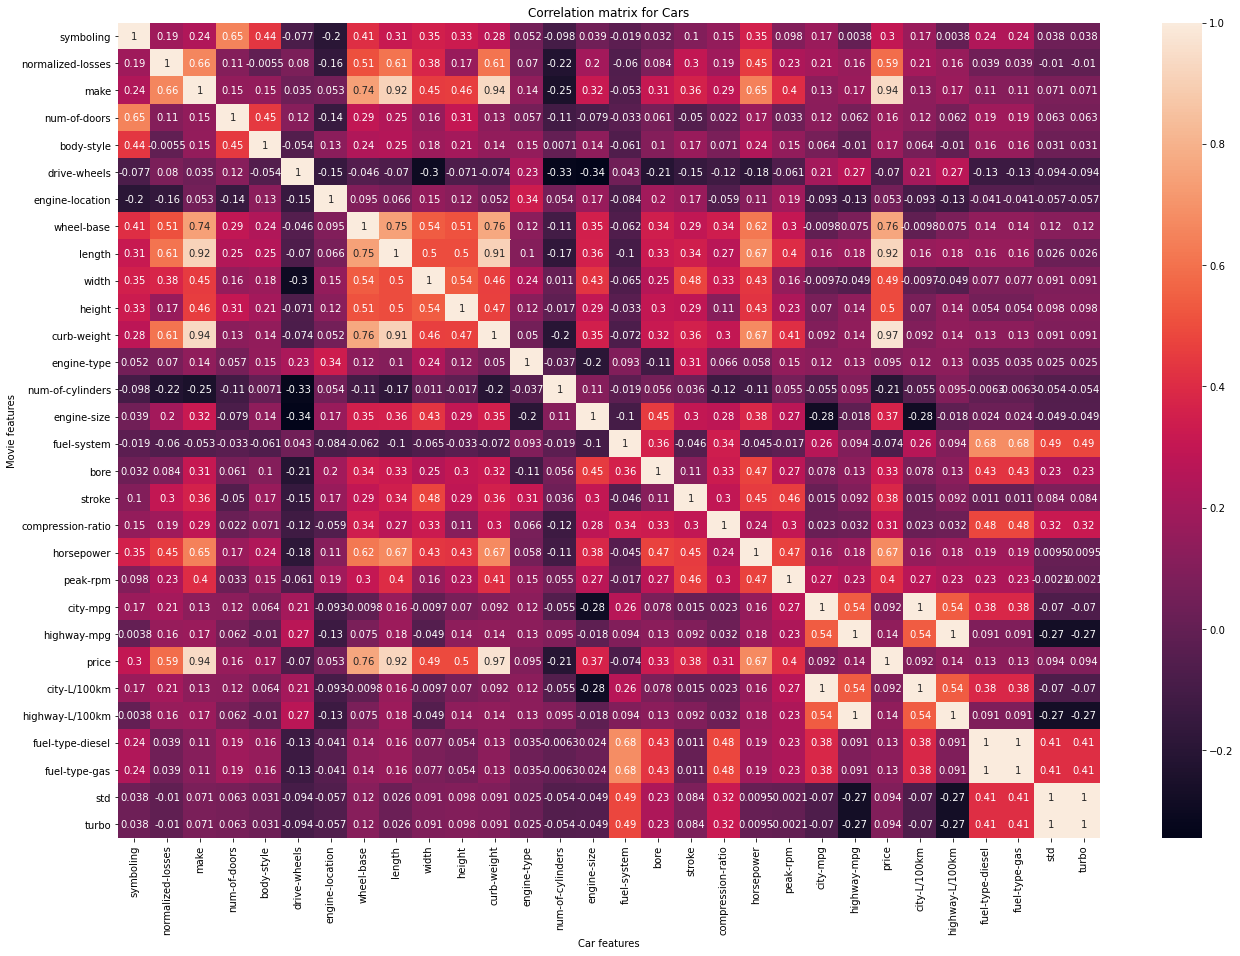

In [40]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
matplotlib.rcParams['figure.figsize'] = (22,15)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Cars")
plt.xlabel("Car features")
plt.ylabel("Movie features")

plt.show()

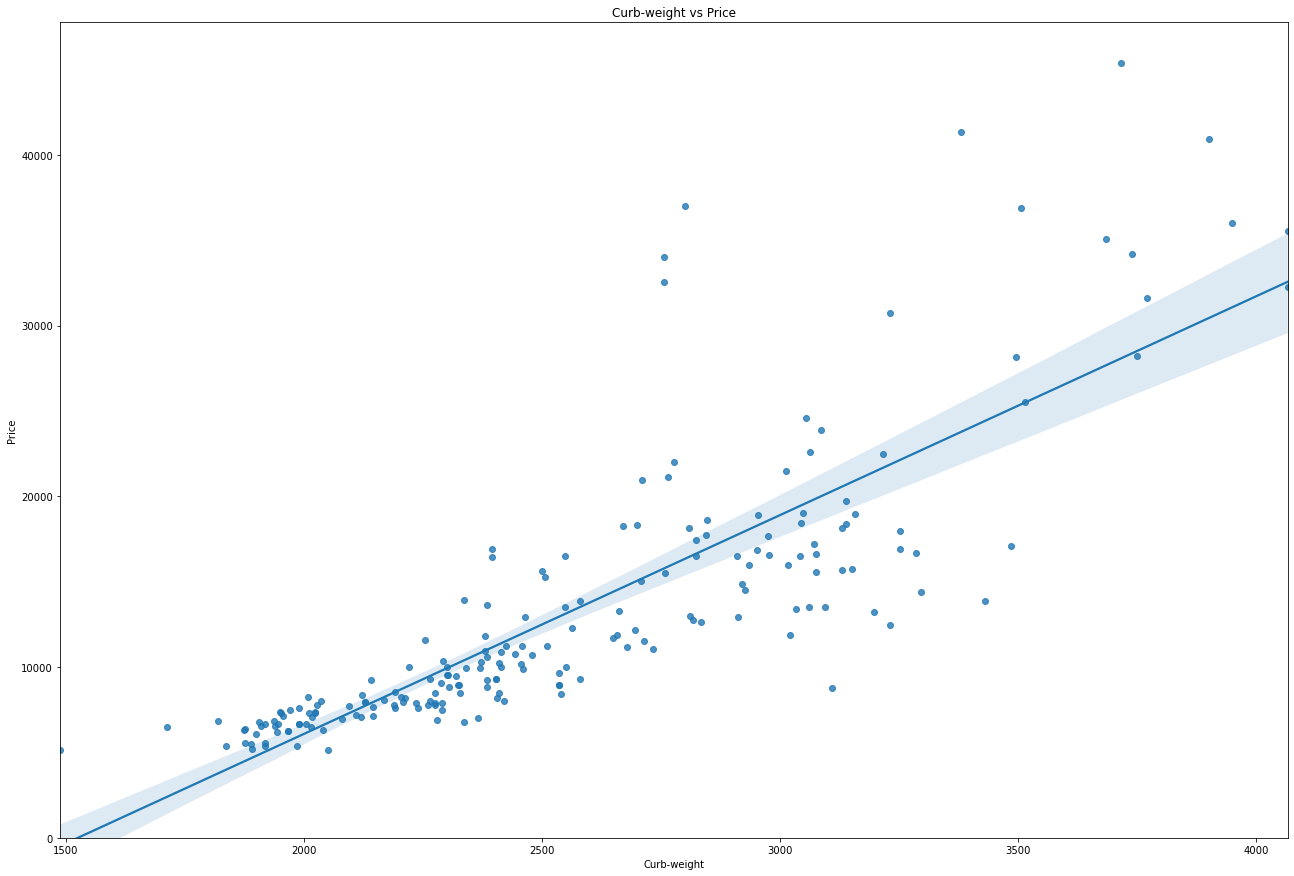

In [41]:
# In the matrix, we see for example a high positive correlation between curb-weight and price

sns.regplot(x="curb-weight", y="price", data=df)
plt.ylim(0,)
plt.title('Curb-weight vs Price')
plt.xlabel('Curb-weight')
plt.ylabel('Price')
plt.show()

In [42]:
# Another way to quickly see the correlation between variables is using 'unstack()'
pd.set_option('display.max_rows', None)
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()

# We sort the output to see first high correlations
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
sorted_pairs

symboling          symboling            1.000000
make               make                 1.000000
compression-ratio  compression-ratio    1.000000
stroke             stroke               1.000000
bore               bore                 1.000000
fuel-system        fuel-system          1.000000
engine-size        engine-size          1.000000
num-of-cylinders   num-of-cylinders     1.000000
engine-type        engine-type          1.000000
curb-weight        curb-weight          1.000000
height             height               1.000000
width              width                1.000000
length             length               1.000000
wheel-base         wheel-base           1.000000
engine-location    engine-location      1.000000
drive-wheels       drive-wheels         1.000000
body-style         body-style           1.000000
horsepower         horsepower           1.000000
peak-rpm           peak-rpm             1.000000
city-mpg           city-mpg             1.000000
fuel-type-diesel   f

In [43]:
# We could also filter to see the highest correlations, let's say > 0.6

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.6]
strong_pairs

symboling          symboling            1.000000
make               make                 1.000000
compression-ratio  compression-ratio    1.000000
stroke             stroke               1.000000
bore               bore                 1.000000
fuel-system        fuel-system          1.000000
engine-size        engine-size          1.000000
num-of-cylinders   num-of-cylinders     1.000000
engine-type        engine-type          1.000000
curb-weight        curb-weight          1.000000
height             height               1.000000
width              width                1.000000
length             length               1.000000
wheel-base         wheel-base           1.000000
engine-location    engine-location      1.000000
drive-wheels       drive-wheels         1.000000
body-style         body-style           1.000000
horsepower         horsepower           1.000000
peak-rpm           peak-rpm             1.000000
city-mpg           city-mpg             1.000000
fuel-type-diesel   f

In [44]:
# Finally, let's Fit a linear regression model to predict the 'price' using the list of features:
        # 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'

features = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']  
Z = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(Z,Y)
print("intercept:", lm.intercept_)
print("slope:", lm.coef_)

intercept: -15806.624626329198
slope: [53.49574423  4.70770099 81.53026382 36.05748882]


In [45]:
lm.score(Z, Y)
print('R-Squared:', lm.score(Z, Y))

R-Squared: 0.8093562806577457


C:\Users\joant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\joant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


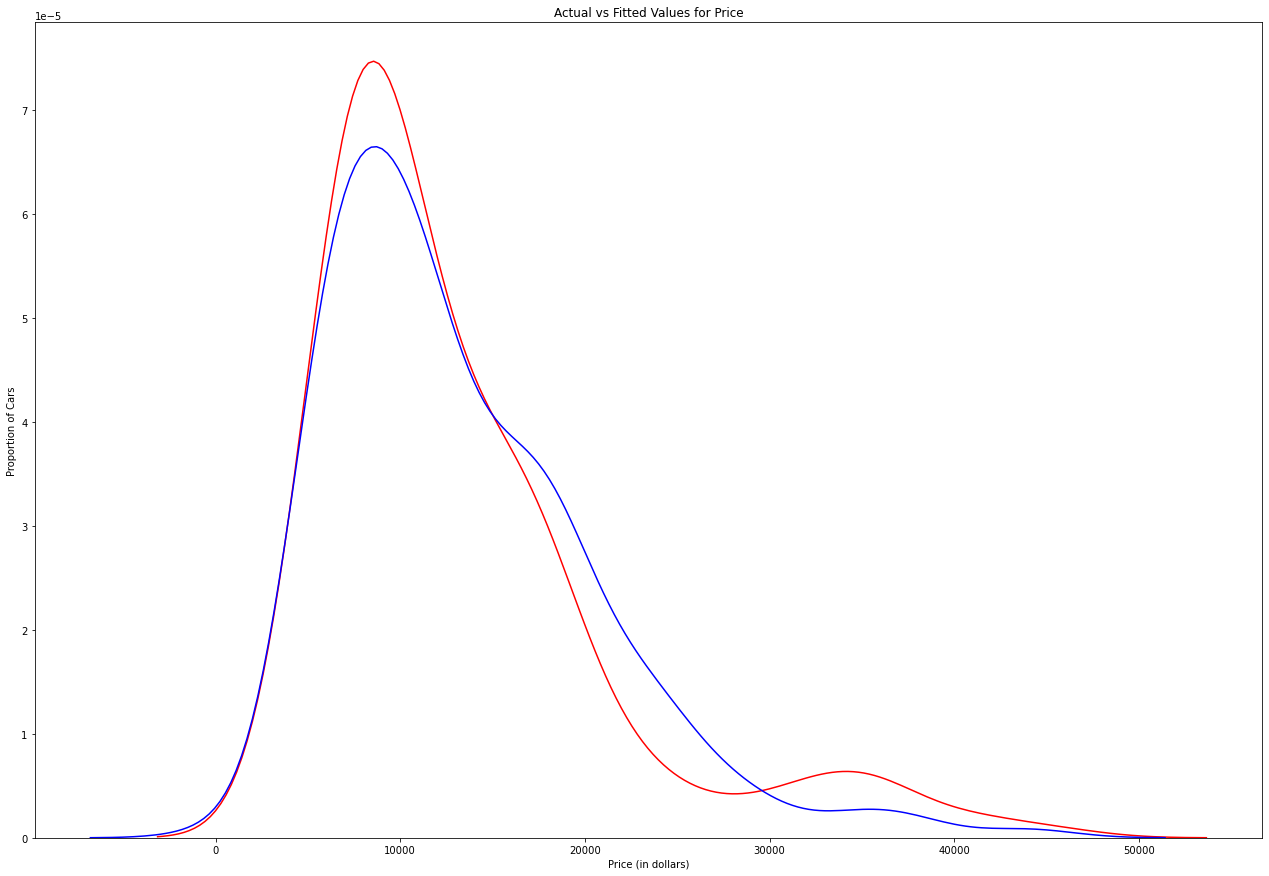

In [46]:
# VISUALIZING MULTIPLE LINEAR REGRESSION

# One way to look at the fit of the model is by looking at the distribution plot. 

# We can look at the distribution of the fitted values that result from the model and compare it to the distribution 
# of the actual values.


Y_hat = lm.predict(Z)

# Distribution Plot

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [47]:
# Fitted values are reasonably close to the actual values since the two distributions overlap a bit.

### Basics of Grouping

In [48]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [49]:
# Average price for each of the different categories of drive-wheels.

df_test1 = df[['drive-wheels','price']]
df_grouped_DriveWheels = df_test1.groupby(['drive-wheels'],as_index= True).mean()
df_grouped_DriveWheels

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [50]:
# Average "price" of each car based on "body-style".

df_gptest2 = df[['body-style','price']]
df_grouped_bodystyle = df_gptest2.groupby(['body-style'],as_index=True).mean()
df_grouped_bodystyle

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


In [51]:
# We can also group by multiple variables. 

# For example, let's group by both 'drive-wheels' and 'body-style'.

df_gptest = df[['drive-wheels','body-style','price']]
df_grouped_test = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grouped_test

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [52]:
# This grouped data is much easier to visualize when it is made into a pivot table.

df_grouped_pivot = df_grouped_test.pivot(index='drive-wheels',columns='body-style')
df_grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [53]:
# We can fill these missing cells with the value 0
df_grouped_pivot = df_grouped_pivot.fillna(0)
df_grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

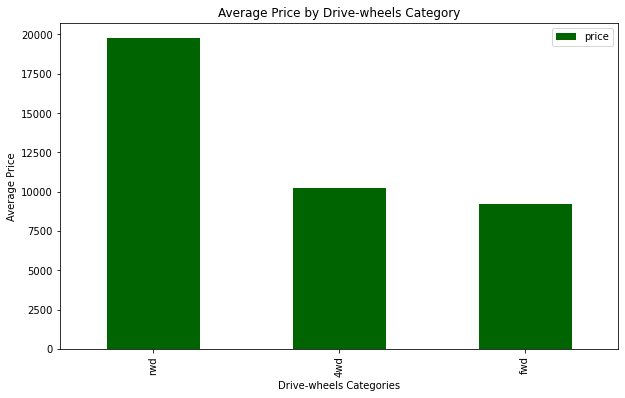

In [54]:
# Plot Data using bar charts

df_sorted_desc= df_grouped_DriveWheels.sort_values('price',ascending=False)
df_sorted_desc.plot(kind='bar', figsize=(10, 6), color='darkgreen')

plt.xlabel('Drive-wheels Categories') 
plt.ylabel('Average Price') 
plt.title('Average Price by Drive-wheels Category') 

plt.show()

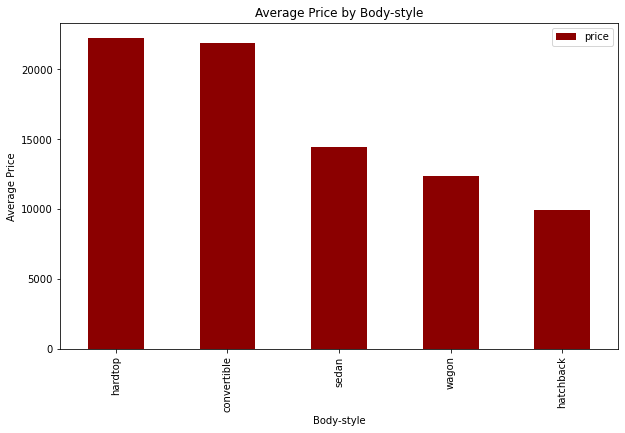

In [55]:
df_sorted_desc= df_grouped_bodystyle.sort_values('price',ascending=False)
df_sorted_desc.plot(kind='bar', figsize=(10, 6), color='darkred')

plt.xlabel('Body-style') 
plt.ylabel('Average Price') 
plt.title('Average Price by Body-style') 

plt.show()

In [56]:
# Thanks for watching!!